# Loan Data Exploration
## by (Anup Kolte)

## Preliminary Wrangling

> This dataset dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate, current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Explore the dataframe size
df.shape

(113937, 81)

In [5]:
#Check datatypes of attributes in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# check for duplicates in the dataset
sum(df.duplicated())

0

In [7]:
# Subset the dataframe by selecting features of interest
columns = ['LoanStatus','LoanOriginalAmount', 'BorrowerAPR','BorrowerRate','ListingCategory (numeric)' ,'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'LoanOriginationDate', ]

df_subset = df[columns]

In [8]:
df_subset.head()

,LoanStatus,LoanOriginalAmount,BorrowerAPR,BorrowerRate,ListingCategory (numeric),StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanOriginationDate
0,Completed,9425,0.16516,0.1580,0,3083.333333,36,NaN,Self-employed,2007-09-12 00:00:00
1,Current,10000,0.12016,0.0920,2,6125.000000,36,A,Employed,2014-03-03 00:00:00
2,Completed,3001,0.28269,0.2750,0,2083.333333,36,NaN,Not available,2007-01-17 00:00:00
3,Current,10000,0.12528,0.0974,16,2875.000000,36,A,Employed,2012-11-01 00:00:00
4,Current,15000,0.24614,0.2085,2,9583.333333,36,D,Employed,2013-09-20 00:00:00


In [9]:
# descriptive statistics for numeric variables
df_subset.describe()

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,ListingCategory (numeric),StatedMonthlyIncome,Term
count,113937.00000,113912.000000,113937.000000,113937.000000,1.139370e+05,113937.000000
mean,8337.01385,0.218828,0.192764,2.774209,5.608026e+03,40.830248
std,6245.80058,0.080364,0.074818,3.996797,7.478497e+03,10.436212
min,1000.00000,0.006530,0.000000,0.000000,0.000000e+00,12.000000
25%,4000.00000,0.156290,0.134000,1.000000,3.200333e+03,36.000000
50%,6500.00000,0.209760,0.184000,1.000000,4.666667e+03,36.000000
75%,12000.00000,0.283810,0.250000,3.000000,6.825000e+03,36.000000
max,35000.00000,0.512290,0.497500,20.000000,1.750003e+06,60.000000


In [10]:
# Remove observations with missing information
df_subset = df_subset[~df_subset.BorrowerAPR.isna()]
df_subset = df_subset[~df_subset.BorrowerRate.isna()]
df_subset = df_subset[~df_subset.Term.isna()]
df_subset = df_subset[~df_subset.LoanOriginalAmount.isna()]
df_subset = df_subset[~df_subset.StatedMonthlyIncome.isna()]


In [11]:
df_subset.head()

,LoanStatus,LoanOriginalAmount,BorrowerAPR,BorrowerRate,ListingCategory (numeric),StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanOriginationDate
0,Completed,9425,0.16516,0.1580,0,3083.333333,36,NaN,Self-employed,2007-09-12 00:00:00
1,Current,10000,0.12016,0.0920,2,6125.000000,36,A,Employed,2014-03-03 00:00:00
2,Completed,3001,0.28269,0.2750,0,2083.333333,36,NaN,Not available,2007-01-17 00:00:00
3,Current,10000,0.12528,0.0974,16,2875.000000,36,A,Employed,2012-11-01 00:00:00
4,Current,15000,0.24614,0.2085,2,9583.333333,36,D,Employed,2013-09-20 00:00:00


### What is the structure of your dataset?

> This dataset contains 81 attributes with 113937 observations. Dataset contains some categorical variables, some timestamp variables and some numerical variables.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding the factors that affect prosper credit rating and pedict default loan credit. Also to predict APR of the borrower.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the toal loan amount will be an interesting factor and I also think that the borrowers stated monthly income, loan term, Prosper rating, employment status will also have effects on the APR.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

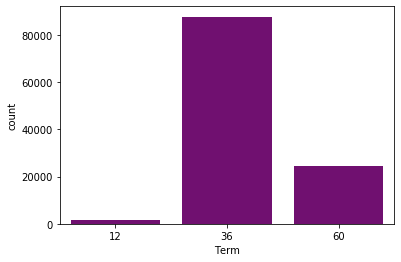

In [12]:
# Visulizing the time periods for loans
sb.countplot(data = df_subset, x = 'Term', color='purple');

> Here by looking bar chart it is clear that term for loan is 36 months which has the most preference 

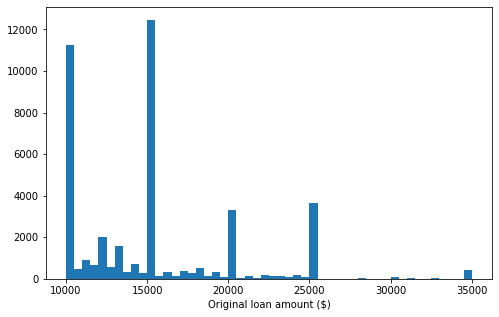

In [13]:
bins = np.arange(10000, df_subset.LoanOriginalAmount.max()+500, 500)
plt.figure(figsize=[8, 5])
plt.hist(data = df_subset, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');

The very large spikes in frequency are at 10k, 15k, 20k, 25k and 35k. There are also small spikes at 8k,9k,11k,12k,13k,14k etc. It means that most of the loans are multiples of 1k.

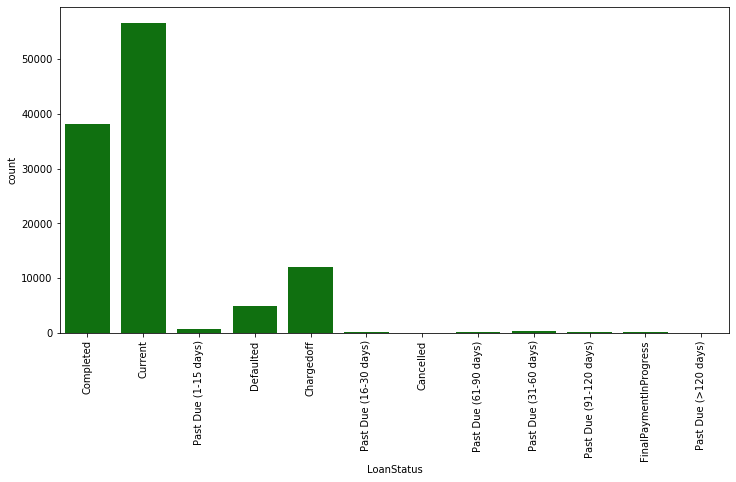

In [14]:
plt.figure(figsize=[12, 6])
plt.xticks(rotation=90)
sb.countplot(data = df_subset, x = 'LoanStatus', color='green');

Most of the loans are Current loans and followed by Completed loans and next Chargeoff and Defaulted loans, other loans are not that much.

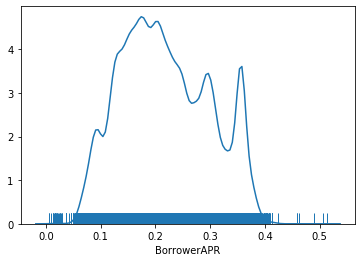

In [15]:
#Distrubution of borrowerAPR 
sb.distplot(df_subset['BorrowerAPR'], hist=False, rug=True);


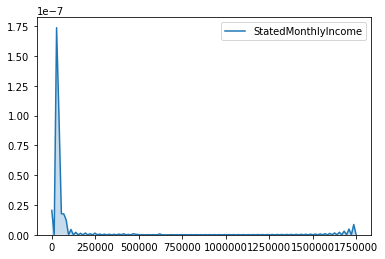

In [16]:
# Distribution of stated monthly income

sb.kdeplot(df_subset['StatedMonthlyIncome'], shade=True);

In [17]:
# List of ratings in order
rating_order = ['AA', 'A', 'B',  'C', 'D', 'E','HR']

# create an ordered categorical ratings variable
df_subset['ProsperRating (Alpha)'] = pd.Categorical(df_subset['ProsperRating (Alpha)'],
                                                    categories=rating_order,
                                                    ordered = True)

We can see that Stated Montly Income has right skewed and Mode is around 5000.

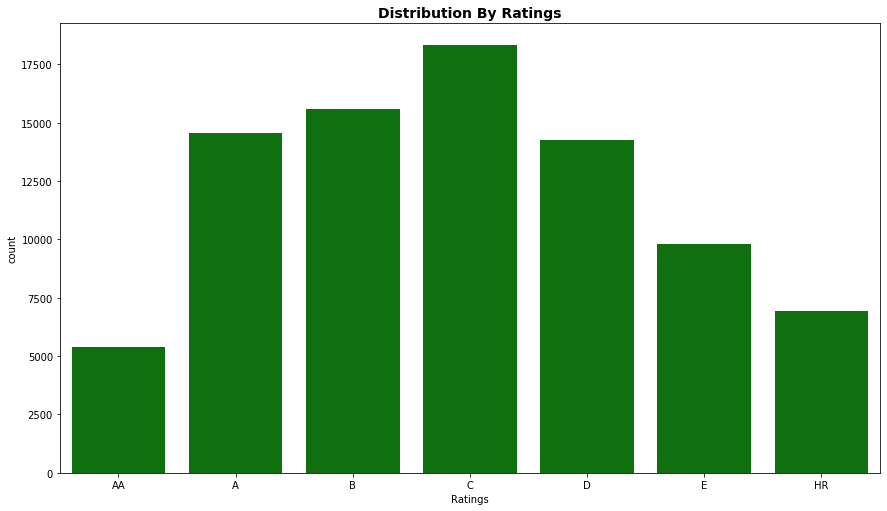

In [18]:
#Check last variables of interest
plt.figure(figsize=[14.70, 8.27])
plt.xticks(rotation=90)
sb.countplot(data = df_subset, x = 'ProsperRating (Alpha)', color = 'green');
plt.xticks(rotation=0);
plt.title("Distribution by Ratings".title(), fontsize = 14, weight = "bold");
plt.xlabel("Ratings");

The ratings of most of the borrowers are among D to A. Most of borrowers are employed and full-time.

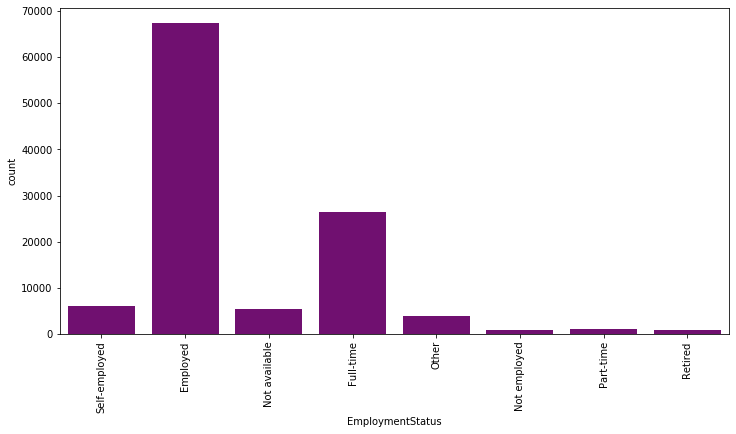

In [49]:
plt.figure(figsize=[12, 6])
plt.xticks(rotation=90)
sb.countplot(data = df_subset, x = 'EmploymentStatus', color = 'purple');
plt.xticks(rotation=90);

Employment Status having Employed as the most occuring among others.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.05 and 0.4. There are no unusual points and no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The majority of loans are actually current loans. Since our main goal is to define driving factors of outcome of loan we are not interested in any current loans (and loans with a specified past due period) also chargedoff loans can be considered as defaulted.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [40]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','BorrowerRate','ListingCategory (numeric)','Term']

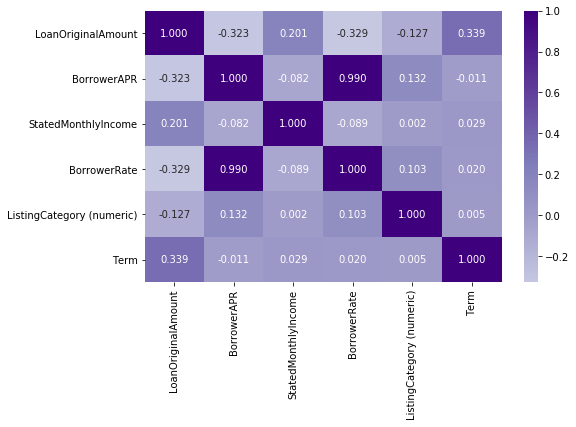

In [56]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_subset[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'Purples', center = 0);

We can see the relations between numerical attributes in this heap map. The relations between the numerical attributes are showed in this heat map in which we can see that having greater borrower APR causes Loan original amount to be less.

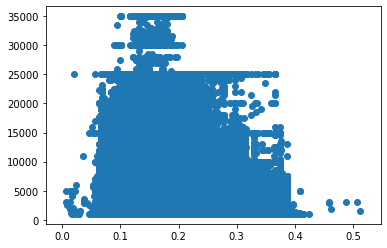

In [82]:
plt.scatter(data=df_subset, x='BorrowerAPR', y='LoanOriginalAmount');


The borrower APR and loan original amount correlation coefficient is negative this shows that these two variables are negatively correlated. 

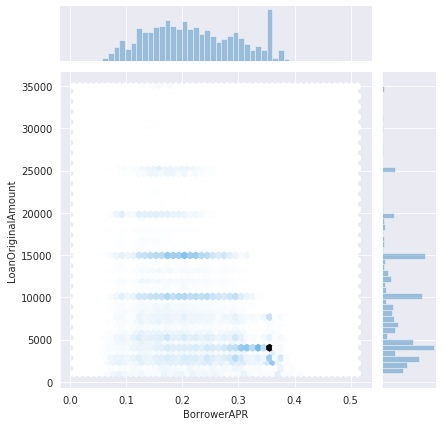

In [58]:
with sb.axes_style("darkgrid"):
    sb.jointplot(x=df_subset['BorrowerAPR'], y=df_subset['LoanOriginalAmount'], kind="hex");

We can see that smaller the prosper rating less loan original amount is there and higher interest rate. Borrowers with the best Prosper ratings have the lowest APR


From this plot we can see that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. The borrower APR is negatively correlated with loan amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the above plots we can infer that prosper rating and loan original amount has positive correlation coefficient. Also, prosper rating and borrower APR has negative correlation coefficient.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  The observation is that prosper rating D is the most frequent rating among defaulted credits.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

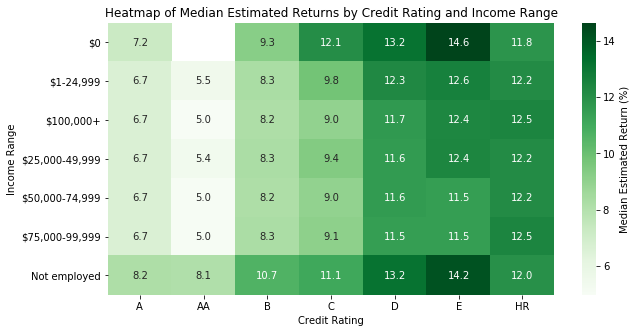

In [90]:
# create a heat map of average estimated returnsb
plt.figure(figsize = [10,5])

cat_med = df.groupby(['ProsperRating (Alpha)', 'IncomeRange']).median()['EstimatedReturn']*100
cat_med = cat_med.reset_index(name = 'EstimatedReturnMedian')
cat_med = cat_med.pivot(index = 'IncomeRange', columns = 'ProsperRating (Alpha)', values = 'EstimatedReturnMedian')

sb.heatmap(cat_med, annot = True, fmt = '.1f', cmap = "Greens", cbar_kws = {'label' : 'Median Estimated Return (%)'})
plt.xlabel('Credit Rating')
plt.ylabel('Income Range')
plt.title('Heatmap of Median Estimated Returns by Credit Rating and Income Range');

The credit ratings 'AA', 'A', and 'B', there is nodifference in the rate of return for income ranges 1-100k. However, there is a definite jump in returns for the 0 income range across all credit rating categories.

In [19]:
top_5_categories = df_subset['ListingCategory (numeric)'].value_counts()[:5]


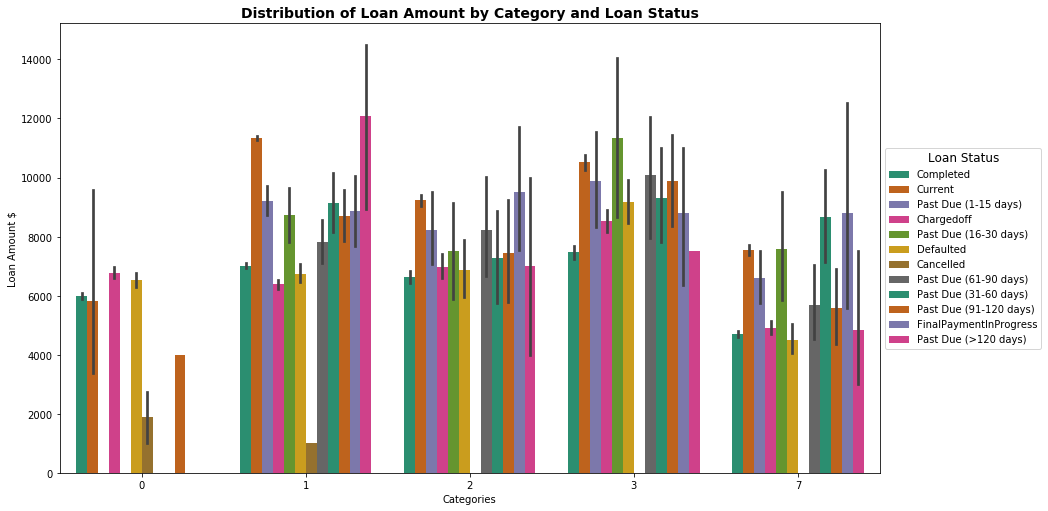

In [20]:
plt.figure(figsize = [14.70, 8.27])
sb.barplot(data=df_subset[df_subset['ListingCategory (numeric)'].isin(top_5_categories.index)],
           x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus', palette = "Dark2");

#set legend and position
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),
          title='Loan Status', title_fontsize = 12);

#add title
plt.title("Distribution of Loan Amount by Category and Loan Status", fontsize = 14, weight='bold');
#edit labels
plt.xlabel("Categories");
plt.ylabel("Loan Amount $");

We can see that Past Due 1-15 Days is having more Loan Amount due.

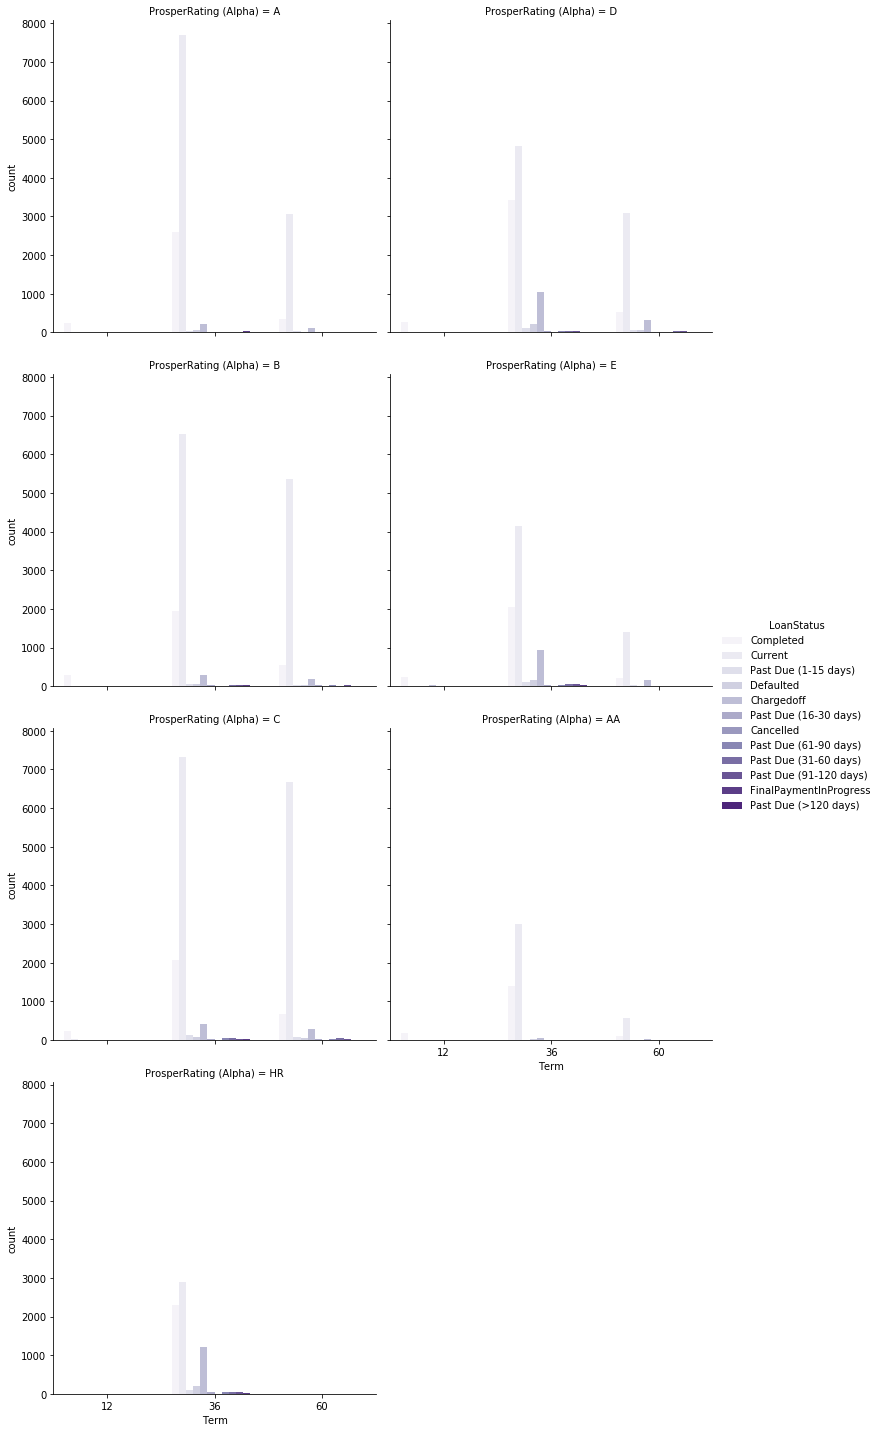

In [60]:
sb.catplot(x='Term', hue='LoanStatus', col='ProsperRating (Alpha)',
              data=df_subset, kind='count', palette='Purples', col_wrap=2
             );

The 36 months and 12 months credits are more likely and 60 months credits seems more risk and there is no short-term or long-term credits for the lowest credit rating.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I think the multivariate plots shows that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. Long term (60 months) loans contains more risk than mid-term and short term.

### Were there any interesting or surprising interactions between features?

> A surprised interactions between features is that the borrowers with more prosper rating having tendencies for more completed credits and borrower APR and loan amount is negatively correlated.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!